In [20]:
path = "/Users/shin/Desktop/結構光學/opencv_python_tutorial/"

# OpenCV 中的图像处理

#### OpenCV 的 HSV 
##### H(色彩/色度) [0-179]， S(飽和度)  [0-255]，V(亮度)  [0-255]

In [2]:
import cv2

flags= [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

# 13.2 物体跟踪

In [ ]:
import cv2
import numpy as np
cap=cv2.VideoCapture(0)
while(1):
        #获取每一帧
        ret,frame=cap.read()
        
        #转换到HSV
        hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        
        #设定蓝色的阈值
        lower_blue=np.array([110,50,50])
        upper_blue=np.array([130,255,255])
        
        #建立指出現藍色的mask
        mask=cv2.inRange(hsv,lower_blue,upper_blue)
        
        #將原圖蓋上一層藍色的mask
        res=cv2.bitwise_and(frame,frame,mask=mask)
        
        #显示图像
        #cv2.imshow('frame',frame)
        #cv2.imshow('mask',mask)
        cv2.imshow('res',res)

        k=cv2.waitKey(5)&0xFF
        if k==27:
            break
#关闭窗口
cv2.destroyAllWindows()

# 13.3 怎样找到要跟踪对象的 HSV 值？

(1, 1, 3) [[[  0 255   0]]]
[[[ 60 255 255]]]
[[150]]


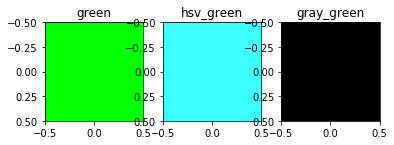

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 10 20:34:29 2014
@author: duan
"""
import cv2
import numpy as np
from matplotlib import pyplot as plt

#green=np.uint8([0,255,0])
#hsv_green=cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
# print(green.shape) (3,)
# error: /builddir/build/BUILD/opencv-2.4.6.1/
# modules/imgproc/src/color.cpp:3541:
# error: (-215) (scn == 3 || scn == 4) && (depth == CV_8U || depth == CV_32F)
# in function cvtColor

#scn (the number of channels of the source),
#i.e. self.img.channels(), is neither 3 nor 4.
#self.img.channels()不是3也不是4
#depth (of the source),
#i.e. self.img.depth(), is neither CV_8U nor CV_32F.
#self.img.depth()不是uint8 也不是uint32
#所以不能用[0,255,0]，而要用[[[0,255,0]]]
#这里的三层括号应该分别对应于cvArray，cvMat，IplImag
#透過指定顏色方式  使用cv2.cvtColor 我们要找到绿色的 HSV 值
green=np.uint8([[[0,255,0]]])
print(green.shape,green)
hsv_green=cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print (hsv_green)
gray_green=cv2.cvtColor(green,cv2.COLOR_BGR2GRAY)
print (gray_green)



plt.subplot(131),plt.imshow(green,'gray'),plt.title('green')
plt.subplot(132),plt.imshow(hsv_green,'gray'),plt.title('hsv_green')
plt.subplot(133),plt.imshow(gray_green,'gray'),plt.title('gray_green')

plt.show()


# 14 几何变换

In [3]:
# #OpenCV 提供了两个变换函数，cv2.warpAﬃne 和 cv2.warpPerspective，
# 使用这两个函数你可以实现所有类型的变换。cv2.warpAﬃne 接收的参数是
# 2 * 3 的变换矩阵，而 cv2.warpPerspective 接收的参数是 3 * 3 的变换矩
# 阵。

In [4]:
# 縮放大小 cv2.INTER_AREA，
# 擴展 v2.INTER_CUBIC（慢) 和 v2.INTER_LINEAR。
# 預設為 cv2.INTER_LINEAR。
# cv2.resize(src, dst, interpolation=CV_INTER_LINEAR)

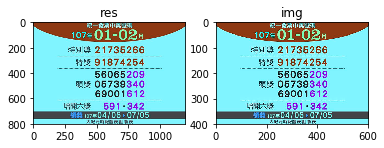

res (800, 1200, 3)
img (400, 600, 3)


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread(path+"222.png")
#下面的None本应该是输出图像的尺寸，但是因为后边我们设置了缩放因子
#因此这里为None
res=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)

#OR
#这里呢，我们直接设置输出图像的尺寸，所以不用设置缩放因子
height,width=img.shape[:2]
res=cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_LINEAR)

plt.subplot(121),plt.imshow(res,'gray'),plt.title('res')
plt.subplot(122),plt.imshow(img,'gray'),plt.title('img')
plt.show()
print('res',res.shape)
print('img',img.shape)
#while(1):
    #cv2.imshow('res',res)
    #cv2.imshow('img',img)
    #if cv2.waitKey(1) & 0xFF == 27:
    #    break
#cv2.destroyAllWindows()
    

# 14.2 平移   P.60

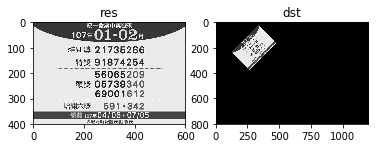

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread(path+"222.png",0)
rows,cols=img.shape
#可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
# cv2.getRotationMatrix2D(旋轉中心,旋轉角度,旋轉後的縮放音子)        
M=cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5)

#   cv2.warpAffine(原圖,要印的圖,輸出的圖像大小(寬,高))
dst=cv2.warpAffine(img,M,(2*cols,2*rows))
#dst=cv2.warpAffine(img,M,(200,500))



plt.subplot(121),plt.imshow(img,'gray'),plt.title('res')
plt.subplot(122),plt.imshow(dst,'gray'),plt.title('dst')

plt.show()
#while(1):
#    cv2.imshow('img',dst)
#    if cv2.waitKey(1)&0xFF==27:
#        break
#cv2.destroyAllWindows()

# 14.4 仿射变换 P.63

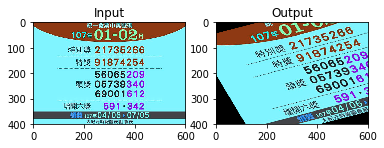

In [90]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 11 10:41:52 2014
@author: duan
"""
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread(path+"222.png")
rows,cols,ch=img.shape

pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[10,100],[200,50],[100,250]])

#pts1 與 pts2連連看
M=cv2.getAffineTransform(pts1,pts2)

dst=cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# 14.5 透视变换 P64

In [ ]:
# cv2.getPerspectiveTransform() 构建。
# 然后把这个矩阵传给函数 cv2.warpPerspective。

(224, 225, 3)
(300, 300, 3)


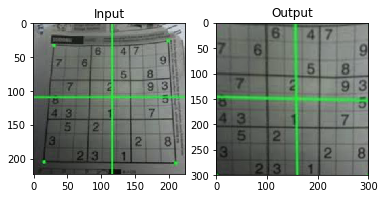

In [107]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread(path+"sudokusmall.png")
print(img.shape)
rows,cols,ch=img.shape

pts1 = np.float32([[35,35],[195,28],[16,205],[210,206]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
#于视角变换，我们需要一个 3x3 变换矩阵。在变换前后直线还是直线。要构建这个变换矩阵你需要在输入图像上找 4 个点
#变换矩阵可以有函数 cv2.getPerspectiveTransform() 构建
#pts1,pts2 連連看,拉直
M=cv2.getPerspectiveTransform(pts1,pts2)
#warpPerspective()擷取出M的部分
dst=cv2.warpPerspective(img,M,(300,300))
print(dst.shape)
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# 15 图像阈值 P.66

In [109]:
# #  cv2.threshhold()。这个函数的第一个参数就是原图像，原图
# 像应该是灰度图。第二个参数就是用来对像素值进行分类的阈值。第三个参数
# 就是当像素值高于（有时是小于）阈值时应该被赋予的新的像素值。

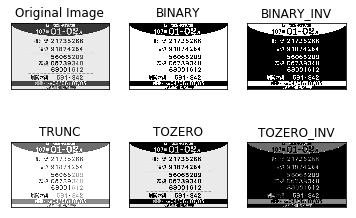

In [110]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread(path + "222.png",0)

ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)  
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) 
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 15.2 自适应阈值 P.68

In [ ]:
#具有不同亮度时

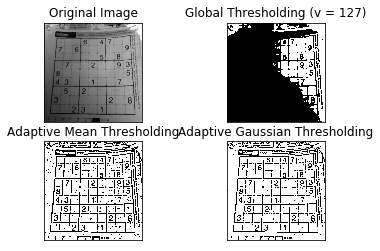

In [111]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+"dave.jpg",0)
#中值滤波
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#11为Block size, 2为C值
# cv2.ADPTIVE_THRESH_MEAN_C：阈值取自相邻区域的平均值
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
    cv2.THRESH_BINARY,11,2)
#cv2.ADPTIVE_THRESH_GAUSSIAN_C：阈值取值相邻区域的加权和，权重为一个高斯窗口。
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
    cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
    'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 15.3 Otsu’s 二值化

In [ ]:
# #简单来说就是对
# 一副双峰图像自动根据其直方图计算出一个阈值。（对于非双峰图像，这种方法
# 得到的结果可能会不理想）

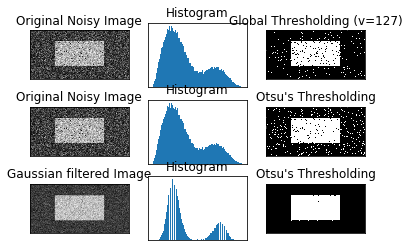

In [112]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+'noisy2.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
#（5,5）为高斯核的大小，0为标准差
blur = cv2.GaussianBlur(img,(5,5),0)

#阈值一定要设为0！  從0開始計算
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
#这里使用了pyplot中画直方图的方法，plt.hist,要注意的是它的参数是一维数组
#所以这里使用了（numpy）ravel方法，将多维数组转换成一维，也可以使用flatten方法
#ndarray.flat 1-D iterator over an array.
#ndarray.flatten 1-D array copy of the elements of an array in row-major order.
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [120]:
import cv2
import numpy as np

img = cv2.imread(path +'noisy2.png',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function 
# 计算归一化直方图
#CalcHist(image, accumulate=0, mask=NULL)

hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities 
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes 
    b1,b2 = np.hsplit(bins,[i]) # weights
    
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    
    # calculates the minimization function
    fn = v1*q1 + v2*q2 
    if fn < fn_min: 
        fn_min = fn
        thresh = i
        
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh,ret)

118 117.0


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


# 16 图像平滑 P75

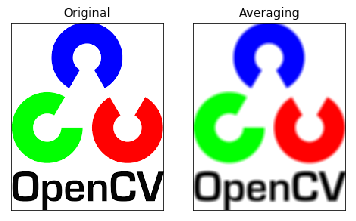

In [126]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+'opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25

#dst輸出圖
#cv.Filter2D(src, dst, kernel, anchor=(-1, -1))
#ddepth –desired depth of the destination image;
#if it is negative, it will be the same as src.depth();
#the following combinations of src.depth() and ddepth are supported:
#src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
#src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_64F, ddepth = -1/CV_64F

#when ddepth=-1, the output image will have the same depth as the source.
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# 图像模糊（图像平滑）P.77

In [127]:
# #使用低通滤波器可以达到图像模糊的目的。这对与去除噪音很有帮助。其
# 实就是去除图像中的高频成分（比如：噪音，边界）。所以边界也会被模糊一
# 点。（当然，也有一些模糊技术不会模糊掉边界）。OpenCV 提供了四种模糊技
# 术。

# 16.1 平均

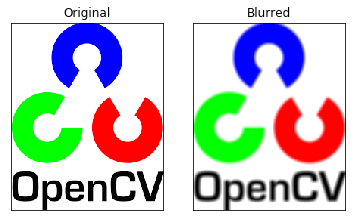

In [138]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+'opencv_logo.png')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 16.2 高斯模糊 P.78

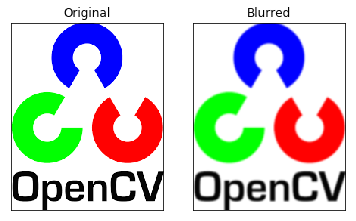

In [145]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+'opencv_logo.png')

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 16.3 中值模糊

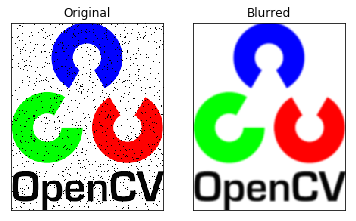

In [133]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+'opencv_logo.png')
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    img[temp_x][temp_y] = 0

median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 16.4 双边滤波 保持邊緣只濾噪點

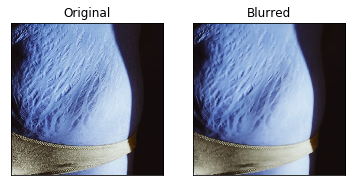

In [143]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(path+'noise3.png')

#cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)
#d – Diameter of each pixel neighborhood that is used during filtering.
# If it is non-positive, it is computed from sigmaSpace
#9邻域直径，两个75分别是空间高斯函数标准差，灰度值相似性高斯函数标准差

blur = cv2.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#纹理被模糊掉了，但是边界还在。

# 17 形态学转换 P.81

In [ ]:
# 腐蝕 去除白噪點

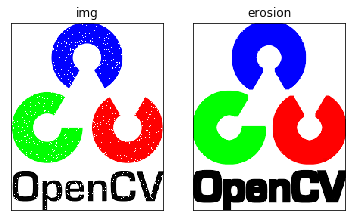

In [159]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

img = cv2.imread(path+'opencv_logo.png')
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    img[temp_x][temp_y] = 255

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('img')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(erosion),plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.show()

# 17.2 膨胀 P.82

In [160]:
#这个操作会增加图像中的白色区域（前景）。一般在去噪声时先用腐蚀再用膨胀。

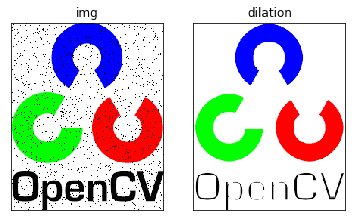

In [167]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+'opencv_logo.png')
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    img[temp_x][temp_y] = 0
kernel = np.ones((5,5),np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('img')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dilation),plt.title('dilation')
plt.xticks([]), plt.yticks([])
plt.show()

# 17.3 开运算  P.83

In [ ]:
#先进性腐蚀再进行膨胀就叫做开运算

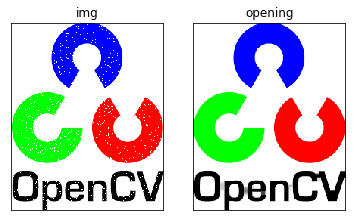

In [170]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+'opencv_logo.png')
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    img[temp_x][temp_y] = 255
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.subplot(121),plt.imshow(img),plt.title('img')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(opening),plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

# 17.4 闭运算

In [ ]:
#先膨胀再腐蚀。它经常被用来填充前景物体中的小洞，或者前景物体上的小黑点。

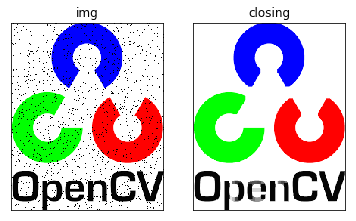

In [173]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+'opencv_logo.png')
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    img[temp_x][temp_y] = 0
    
kernel = np.ones((5,5),np.uint8)    
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.subplot(121),plt.imshow(img),plt.title('img')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

# 17.5 形态学梯度

In [174]:
#其实就是一幅图像膨胀与腐蚀的差别。结果看上去就像前景物体的轮廓。

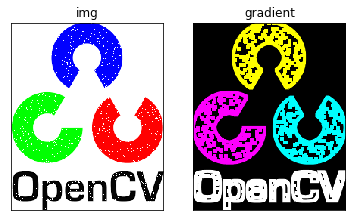

In [181]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(path+'opencv_logo.png')
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    img[temp_x][temp_y] = 255
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.subplot(121),plt.imshow(img),plt.title('img')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient),plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()

# 17.6 礼帽 

In [ ]:
#原始图像与进行开运算之后得到的图像的差。下面的例子是用一个 9x9 的核进行礼帽操作的结果。

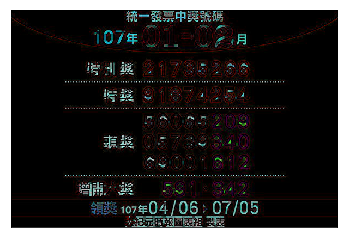

In [198]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
zimg = cv2.imread(path,0)
kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat)
plt.xticks([]), plt.yticks([])
plt.show()

# 17.7 黑帽 

In [183]:
#进行闭运算之后得到的图像与原始图像的差。

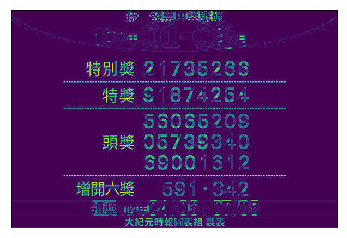

In [199]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+"222.png",0)
kernel = np.ones((5,5),np.uint8)

blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat)
plt.xticks([]), plt.yticks([])
plt.show()

# 18 图像梯度

In [200]:
# #目标
# • 图像梯度，图像边界等
# • 使用到的函数有：cv2.Sobel()，cv2.Schar()，cv2.Laplacian() 等
#OpenCV 提供了三种不同的梯度滤波器，或者说高通滤波器：Sobel，Scharr 和 Laplacian

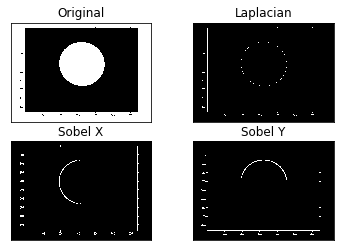

In [228]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 12 11:01:40 2014
@author: duan
"""
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread(path+"box.png",0)

#cv2.CV_64F输出图像的深度（数据类型），可以使用-1,与原图像保持一致np.uint8               
laplacian=cv2.Laplacian(img,-1)

#参数1,0为只在x方向求一阶导数，最大可以求2阶导数。
sobelx=cv2.Sobel(img,-1,1,0,ksize=5)

#参数0,1为只在y方向求一阶导数，最大可以求2阶导数。
sobely=cv2.Sobel(img,-1,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

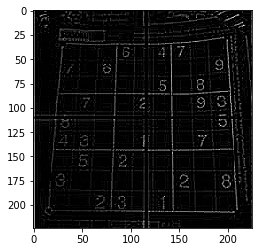

In [221]:
plt.imshow(laplacian,cmap = 'gray')
plt.show()

In [222]:
# 一个重要的事!
# 在查看上面这个例子的注释时不知道你有没有注意到：当我们可以通过参
# 数 -1 来设定输出图像的深度（数据类型）与原图像保持一致，但是我们在代
# 码中使用的却是 cv2.CV_64F。这是为什么呢？想象一下一个从黑到白的边界
# 的导数是整数，而一个从白到黑的边界点导数却是负数。如果原图像的深度是
# np.int8 时，所有的负值都会被截断变成 0，换句话说就是把把边界丢失掉。
# 所以如果这两种边界你都想检测到，最好的的办法就是将输出的数据类型
# 设置的更高，比如 cv2.CV_16S，cv2.CV_64F 等。取绝对值然后再把它转回
# 到 cv2.CV_8U。下面的示例演示了输出图片的深度不同造成的不同效果。

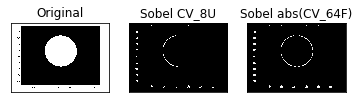

In [226]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread(path+"box.png",0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
#也可以将参数设为-1
#sobelx8u = cv2.Sobel(img,-1,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

# 19 Canny 边缘检测

In [ ]:
# OpenCV 中的 Canny 边缘检测
# • 了解 Canny 边缘检测的概念
# • 学习函数 cv2.Canny()

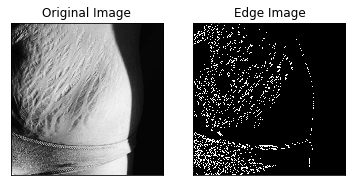

In [255]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path+"noise3.png",0)

edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# 20 图像金字塔 P.94

In [10]:
# 目标
# • 学习图像金字塔
# • 使用图像创建一个新水果：“橘子苹果”
# • 将要学习的函数有：cv2.pyrUp()，cv2.pyrDown()。

(400, 600) (200, 300) (100, 150) (50, 75)


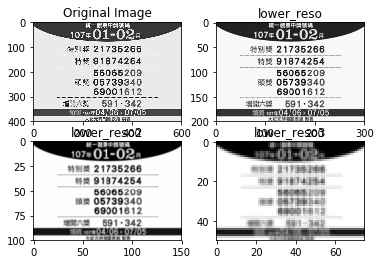

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 函数 cv2.pyrDown() 从一个高分辨率大尺寸的图像向上构建一个金子塔
img=cv2.imread(path+"222.png",0)
lower_reso = cv2.pyrDown(img)
lower_reso2 = cv2.pyrDown(lower_reso)
lower_reso3 = cv2.pyrDown(lower_reso2)
print(img.shape,lower_reso.shape,lower_reso2.shape,lower_reso3.shape)



plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.subplot(222),plt.imshow(lower_reso,cmap = 'gray')
plt.title('lower_reso')
plt.subplot(223),plt.imshow(lower_reso2,cmap = 'gray')
plt.title('lower_reso2')
plt.subplot(224),plt.imshow(lower_reso3,cmap = 'gray')
plt.title('lower_reso3')
plt.show()
# 尺寸变小，分辨率降低

(400, 600) (800, 1200) (1600, 2400) (3200, 4800)


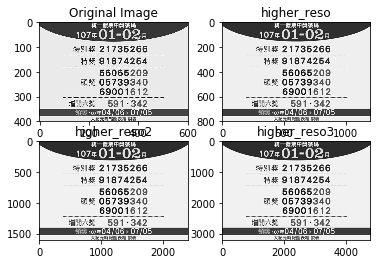

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#函数 cv2.pyrUp() 从一个低分辨率小尺寸的图像向下构建一个金子塔
img=cv2.imread(path+"222.png",0)
higher_reso = cv2.pyrUp(img)
higher_reso2 = cv2.pyrUp(higher_reso)
higher_reso3 = cv2.pyrUp(higher_reso2)
print(img.shape,higher_reso.shape,higher_reso2.shape,higher_reso3.shape)



plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.subplot(222),plt.imshow(higher_reso,cmap = 'gray')
plt.title('higher_reso')
plt.subplot(223),plt.imshow(higher_reso2,cmap = 'gray')
plt.title('higher_reso2')
plt.subplot(224),plt.imshow(higher_reso3,cmap = 'gray')
plt.title('higher_reso3')
plt.show()

#(尺寸变大，但分辨率不会增加)

# 20.2 使用金字塔进行图像融合

In [17]:
# #，在图像缝合中，你需要将两幅
# 图叠在一起，但是由于连接区域图像像素的不连续性，整幅图的效果看起来会
# 很差。这时图像金字塔就可以排上用场了，他可以帮你实现无缝连接

A: (240, 240, 3) B: (240, 240, 3)
G: (240, 240, 3)
gpA: (120, 120, 3)
gpA: (60, 60, 3)
gpA: (30, 30, 3)
gpA: (15, 15, 3)
gpA: (8, 8, 3)
gpA: (4, 4, 3)
gpB: (120, 120, 3)
gpB: (60, 60, 3)
gpB: (30, 30, 3)
gpB: (15, 15, 3)
gpB: (8, 8, 3)
gpB: (4, 4, 3)
lpA: [(8, 8, 3)]
L: (15, 15, 3) (15, 15, 3) (8, 8, 3)
L: (30, 30, 3) (30, 30, 3) (15, 15, 3)
L: (60, 60, 3) (60, 60, 3) (30, 30, 3)
L: (120, 120, 3) (120, 120, 3) (60, 60, 3)
L: (240, 240, 3) (240, 240, 3) (120, 120, 3)
(240, 240, 3)


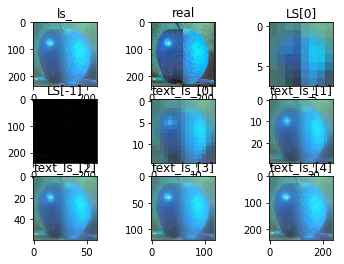

In [40]:
import cv2
import numpy as np,sys
from matplotlib import pyplot as plt


A = cv2.imread(path+"apple.jpg")
B = cv2.imread(path+"orange.jpg")
print("A:",A.shape,"B:",B.shape)
# generate Gaussian pyramid for A
G = A.copy()
print("G:",G.shape)
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)
    print("gpA:",G.shape)


# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)
    print("gpB:",G.shape)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
print("lpA:",[i.shape for i in lpA])
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    #print("L1:",gpA[i-1].shape,GE.shape)
    GE = cv2.resize(GE,(gpA[i-1].shape[0],gpA[i-1].shape[1]))
    L = cv2.subtract(gpA[i-1],GE)
    print("L:",gpA[i-1].shape,GE.shape,gpA[i].shape)
    lpA.append(L)
    
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    GE = cv2.resize(GE,(gpB[i-1].shape[0],gpB[i-1].shape[1]))
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
    
# Now add left and right halves of images in each level
#numpy.hstack(tup)
#Take a sequence of arrays and stack them horizontally
#to make a single array.
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

ls_ = LS[0]
text_ls_ = []
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.resize(ls_,(LS[i].shape[0],LS[i].shape[1]))
    ls_ = cv2.add(ls_, LS[i])
    text_ls_.append(ls_)
print(ls_.shape)

real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

plt.subplot(331),plt.imshow(ls_,cmap = 'gray')
plt.title('ls_')
plt.subplot(332),plt.imshow(real,cmap = 'gray')
plt.title('real')
plt.subplot(333),plt.imshow(LS[0],cmap = 'gray')
plt.title('LS[0]')
plt.subplot(334),plt.imshow(LS[-1],cmap = 'gray')
plt.title('LS[-1]')
plt.subplot(335),plt.imshow(text_ls_[0],cmap = 'gray')
plt.title('text_ls_[0]')
plt.subplot(336),plt.imshow(text_ls_[1],cmap = 'gray')
plt.title('text_ls_[1]')
plt.subplot(337),plt.imshow(text_ls_[2],cmap = 'gray')
plt.title('text_ls_[2]')
plt.subplot(338),plt.imshow(text_ls_[3],cmap = 'gray')
plt.title('text_ls_[3]')
plt.subplot(339),plt.imshow(text_ls_[4],cmap = 'gray')
plt.title('text_ls_[4]')
#plt.xticks([]), plt.yticks([])
plt.show()
# image with direct connecting each half


#cv2.imwrite(path+'Pyramid_blending2.jpg',ls_)
#cv2.imwrite(path+'Direct_blending.jpg',real)

# 21 OpenCV 中的轮廓 P.101

In [ ]:
# 目标
# • 理解什么是轮廓
# • 学习找轮廓，绘制轮廓等
# • 函数：cv2.ﬁndContours()，cv2.drawContours()
# 轮廓在形状分析和物体的检测和识别中很有用。

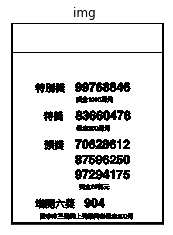

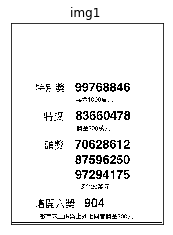

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 12 18:05:52 2014
@author: duan
"""
import numpy as np
import cv2
from matplotlib import pyplot as plt
im = cv2.imread(path)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
img1 = cv2.drawContours(image, contours, 3, (0,255,0), 3)


plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('img '), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(122),plt.imshow(img1,cmap = 'gray')
plt.title('img1 '), plt.xticks([]), plt.yticks([])
plt.show()

# 21.2 轮廓特征

In [ ]:
# 目标
# • 查找轮廓的不同特征，例如面积，周长，重心，边界框等。
# • 你会学到很多轮廓相关函数

# 21.2.1 矩

In [ ]:
#图像的矩可以帮助我们计算图像的质心，面积等... 函数 cv2.moments() 会将计算得到的矩以一个字典的形式返回

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 12 18:30:17 2014
@author: duan
"""
import cv2
import numpy as np
img = cv2.imread(path1,0)
ret,thresh = cv2.threshold(img,127,255,0)
contours = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print (M)

{'nu02': 0.0, 'm02': 0.0, 'nu21': 0.0, 'nu11': 0.0, 'mu03': 0.0, 'm12': 0.0, 'mu11': 0.0, 'nu20': 0.0, 'mu20': 0.0, 'm11': 0.0, 'nu30': 0.0, 'nu12': 0.0, 'mu30': 0.0, 'm20': 0.0, 'mu12': 0.0, 'm03': 0.0, 'm01': 0.0, 'm10': 0.0, 'm21': 0.0, 'mu02': 0.0, 'mu21': 0.0, 'nu03': 0.0, 'm30': 0.0, 'm00': 0.0}


# 21.2.2 轮廓面积

In [ ]:
# #轮廓的面积可以使用函数 cv2.contourArea() 计算得到，也可以使用矩
# （0 阶矩），M['m00']。

In [23]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 12 18:30:17 2014
@author: duan
"""
import cv2
import numpy as np
img = cv2.imread(path1,0)
ret,thresh = cv2.threshold(img,127,255,0)
contours = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
perimeter = cv2.arcLength(cnt,True)
print (perimeter)

error: /opt/concourse/worker/volumes/live/ca251eb6-4989-473b-4e46-71e0f4f3e8d3/volume/opencv_1512680485339/work/modules/imgproc/src/shapedescr.cpp:284: error: (-215) count >= 0 && (depth == 5 || depth == 4) in function arcLength


# 21.2.3 轮廓周长

In [ ]:
# 也被称为弧长。可以使用函数 cv2.arcLength() 计算得到。这个函数
# 的第二参数可以用来指定对象的形状是闭合的（True），还是打开的（一条曲
# 线）。

In [ ]:
perimeter = cv2.arcLength(cnt,True)

# 21.2.4 轮廓近似

In [ ]:
# #为了帮助理解，假设我们要在一幅图像中查找一个矩形，但是由于图像的
# 种种原因，我们不能得到一个完美的矩形，而是一个“坏形状”（如下图所示）。
# 现在你就可以使用这个函数来近似这个形状（）了。这个函数的第二个参数叫
# epsilon，它是从原始轮廓到近似轮廓的最大距离。它是一个准确度参数。选
# 择一个好的 epsilon 对于得到满意结果非常重要。

In [ ]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

# 21.2.5 凸包

In [ ]:
# 凸包与轮廓近似相似，但不同，虽然有些情况下它们给出的结果是一样的。
# 函数 cv2.convexHull() 可以用来检测一个曲线是否具有凸性缺陷，并能纠
# 正缺陷。一般来说，凸性曲线总是凸出来的，至少是平的。如果有地方凹进去
# 了就被叫做凸性缺陷。例如下图中的手。红色曲线显示了手的凸包，凸性缺陷
# 被双箭头标出来了。

In [ ]:
#  points 我们要传入的轮廓
# • hull 输出，通常不需要
# • clockwise 方向标志。如果设置为 True，输出的凸包是顺时针方向的。
# 否则为逆时针方向。
# • returnPoints 默认值为 True。它会返回凸包上点的坐标。如果设置
# 为 False，就会返回与凸包点对应的轮廓上的点。

hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]

In [ ]:
# 要获得上图的凸包，下面的命令就够了：
# hull = cv2.convexHull(cnt)
#如果你想获得凸性缺陷，需要把 returnPoints 设置为 False。

# 21.2.6 凸性检测

In [ ]:
# #函数 cv2.isContourConvex() 可以可以用来检测一个曲线是不是凸
# 的。它只能返回 True 或 False。
k = cv2.isContourConvex(cnt)

# 21.2.7 边界矩形

In [ ]:
# 直边界矩形   旋转的边界矩形  功能圖片 請參考P.108頁

##直边界矩形 

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

##旋转的边界矩形 

In [ ]:
#  这个边界矩形是面积最小的，因为它考虑了对象的旋转。用
# 到的函数为 cv2.minAreaRect()。返回的是一个 Box2D 结构
#但是要绘制这个矩形需要矩形的 4 个角点，可以通过函数 cv2.boxPoints() 获得。

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [ ]:
path_example1 = '/Users/xinyingpeng/Downloads/Jack_Task/example.jpg'

# 21.2.8 最小外接圆

In [ ]:
#函数 cv2.minEnclosingCircle() 可以帮我们找到一个对象的外切圆

In [ ]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

# 21.2.9 椭圆拟合

In [ ]:
#使用的函数为 cv2.ellipse()，返回值其实就是旋转边界矩形的内切圆。
#圖形參考 P.109
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(im,ellipse,(0,255,0),2)

# 21.2.10 直线拟合

In [ ]:
# 我们可以根据一组点拟合出一条直线，同样我们也可以为图像中的白色点
# 拟合出一条直线。
# 功能圖片請參考Ｐ.110

In [ ]:
rows,cols = img.shape[:2]
#cv2.fitLine(points, distType, param, reps, aeps[, line ]) → line
#points – Input vector of 2D or 3D points, stored in std::vector<> or Mat.
#line – Output line parameters. In case of 2D fitting, it should be a vector of
#4 elements (likeVec4f) - (vx, vy, x0, y0), where (vx, vy) is a normalized
#vector collinear to the line and (x0, y0) is a point on the line. In case of
#3D fitting, it should be a vector of 6 elements (like Vec6f) - (vx, vy, vz,
#x0, y0, z0), where (vx, vy, vz) is a normalized vector collinear to the line
#and (x0, y0, z0) is a point on the line.
#distType – Distance used by the M-estimator
#distType=CV_DIST_L2
#ρ(r) = r2 /2 (the simplest and the fastest least-squares method)
#param – Numerical parameter ( C ) for some types of distances. If it is 0, an optimal value
#is chosen.
#reps – Sufficient accuracy for the radius (distance between the coordinate origin and the
#line).
#aeps – Sufficient accuracy for the angle. 0.01 would be a good default value for reps and
#aeps.
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

# 21.3 轮廓的性质

In [ ]:
#学习提取一些经常使用的对象特征

# 21.3.1 长宽比

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

# 21.3.2 Extent

In [ ]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

# 21.3.3 Solidity

In [ ]:
# 轮廓面积与凸包面积的比。

In [ ]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

# 21.3.4 Equivalent Diameter

In [ ]:
#与轮廓面积相等的圆形的直径

In [ ]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

# 21.3.5 方向

In [ ]:
#对象的方向，下面的方法还会返回长轴和短轴的长度

In [ ]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

# 21.3.6 掩模和像素点

In [ ]:
#有时我们需要构成对象的所有像素点，我们可以这样做：

In [ ]:
mask = np.zeros(imgray.shape,np.uint8)
#这里一定要使用参数-1,绘制填充的的轮廓
cv2.drawContours(mask,[cnt],0,255,-1)
#Returns a tuple of arrays, one for each dimension of a,
#containing the indices of the non-zero elements in that dimension.
#The result of this is always a 2-D array, with a row for
#each non-zero element.
#To group the indices by element, rather than dimension, use:
#transpose(nonzero(a))
#>>> x = np.eye(3)
#>>> x
#array([[ 1., 0., 0.],
# [ 0., 1., 0.],
# [ 0., 0., 1.]])
#>>> np.nonzero(x)
#(array([0, 1, 2]), array([0, 1, 2]))
#>>> x[np.nonzero(x)]
#array([ 1., 1., 1.])
#>>> np.transpose(np.nonzero(x))
#array([[0, 0],
# [1, 1],
# [2, 2]])
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

# 21.3.7 最大值和最小值及它们的位置

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)

# 21.3.8 平均颜色及平均灰度

In [ ]:
# 我们也可以使用相同的掩模求一个对象的平均颜色或平均灰度
mean_val = cv2.mean(im,mask = mask)

# 21.3.9 极点

In [ ]:
# 一个对象最上面，最下面，最左边，最右边的点。
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

# 21.4 轮廓：更多函数

In [ ]:
# 我们要学习
# • 凸缺陷，以及如何找凸缺陷
# • 找某一点到一个多边形的最短距离
# • 不同形状的匹配

# 21.4.1 凸缺陷

In [ ]:
# OpenCV 中有一个函数 cv.convexityDefect() 可以帮助我们找到凸缺
# 陷。函数调用如下：

#注意：如果要查找凸缺陷，在使用函数 cv2.convexHull 找凸包时，参数returnPoints 一定要是 False。

In [ ]:
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

In [31]:
import cv2
import numpy as np

img = cv2.imread(path)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
contours = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: too many values to unpack (expected 2)

# 21.4.2 Point Polygon Test

In [ ]:
# 求解图像中的一个点到一个对象轮廓的最短距离。如果点在轮廓的外部，
# 返回值为负。如果在轮廓上，返回值为 0。如果在轮廓内部，返回值为正。

In [ ]:
# #此函数的第三个参数是 measureDist。如果设置为 True，就会计算最
# 短距离。如果是 False，只会判断这个点与轮廓之间的位置关系（返回值为
# +1，-1，0）。
#如果你不需要知道具体距离，建议你将第三个参数设为 False，这样速
#度会提高 2 到 3 倍。
dist = cv2.pointPolygonTest(cnt,(50,50),True)

# 21.4.3 形状匹配

In [ ]:
# 函数 cv2.matchShape() 可以帮我们比较两个形状或轮廓的相似度。如
# 果返回值越小，匹配越好

In [40]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 13 20:57:38 2014
@author: duan
"""
import cv2
import numpy as np
img1 = cv2.imread(path,0)
img2 = cv2.imread(path1,0)
ret, thresh = cv2.threshold(img1, 127, 255,0)
ret, thresh2 = cv2.threshold(img2, 127, 255,0)
#contours,hierarchy = cv2.findContours(thresh,2,1)
contours = cv2.findContours(thresh,2,1)
cnt1 = contours[0]
#contours,hierarchy = cv2.findContours(thresh2,2,1)
contours = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]
ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print (ret)


plt.subplot(121),plt.imshow(cnt1,cmap = 'gray')
plt.title('cnt1 '), plt.xticks([]), plt.yticks([])
plt.show()

1.7976931348623157e+308


/Users/xinyingpeng/test/anaconda/envs/spyder-3.0.2/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TypeError: Image data cannot be converted to float

# 21.5 轮廓的层次结构 P.119  

In [ ]:
# # 目标
# 现在我们要学习轮廓的层次结构了，比如轮廓之间的父子关系。

# 22 直方图

In [ ]:
# 使用 OpenCV 或 Numpy 函数计算直方图
# • 使用 Opencv 或者 Matplotlib 函数绘制直方图
# • 将要学习的函数有：cv2.calcHist()，np.histogram()
#？通过直方图你可以对整幅图像的灰度分布有一个整体的
# 了解。直方图的 x 轴是灰度值（0 到 255），y 轴是图片中具有同一个灰度值的
# 点的数目。

# 22.1.1 统计直方图

In [44]:
import cv2
import numpy as np
img = cv2.imread(path1,0)
#别忘了中括号[img],[0],None,[256],[0,256]只有mask没有中括号
hist = cv2.calcHist([img],[0],None,[256],[0,256])
#hist,bins = np.histogram(img.ravel(),256,[0,256])

# 22.1.2 绘制直方图

In [ ]:
# 有两种方法来绘制直方图：
# 1. Short Way（简单方法）：使用 Matplotlib 中的绘图函数。
# 2. Long Way（复杂方法）：使用 OpenCV 绘图函数

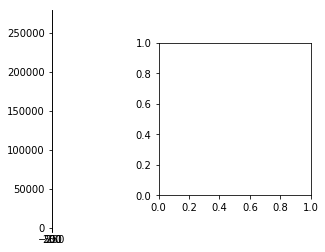

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(path,0)
plt.hist(img.ravel(),256,[0,256]);
plt.show()

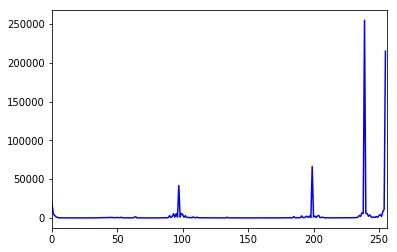

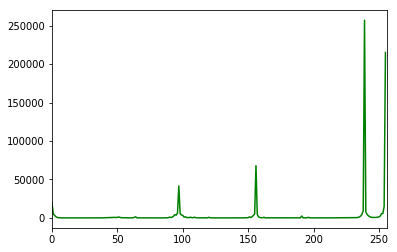

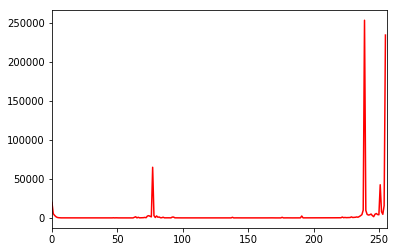

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(path)
color = ('b','g','r')
#对一个列表或数组既要遍历索引又要遍历元素时
#使用内置enumerrate函数会有更加直接，优美的做法
#enumerate会将数组或列表组成一个索引序列。
#使我们再获取索引和索引内容的时候更加方便
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.show()

# 22.1.3 使用掩模

In [ ]:
# 要统计图像某个局部区域的直方图只需要构建一副掩模图像。将要统计的
# 部分设置成白色，其余部分为黑色，就构成了一副掩模图像。然后把这个掩模
# 图像传给函数就可以了。

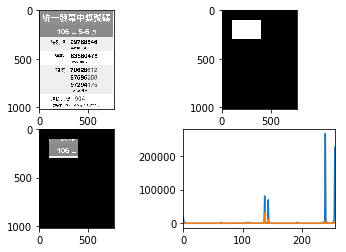

In [53]:
img = cv2.imread(path,0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

# 22.2 直方图均衡化

In [ ]:
#本小节我们要学习直方图均衡化的概念，以及如何使用它来改善图片的对比。

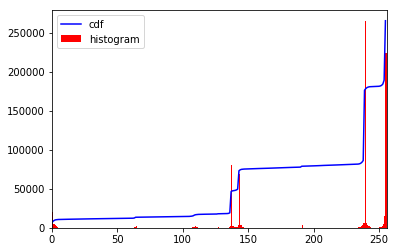

In [55]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 16 10:15:23 2014
@author: duan
"""
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(path,0)
#flatten()将数组变成一维
hist,bins = np.histogram(img.flatten(),256,[0,256])
#计算累积分布图
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# 22.2.2 CLAHE 有限对比适应性直方图均衡化

In [57]:
import numpy as np
import cv2
img = cv2.imread(path,0)
# create a CLAHE object (Arguments are optional).
#不知道为什么我没好到createCLAHE这个模块
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('clahe_2.jpg',cl1)

True

# 22.3 2D 直方图

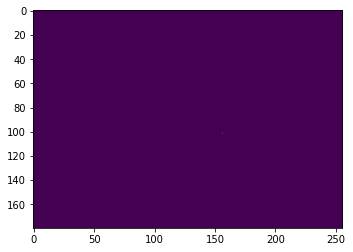

In [61]:
#@author: duan

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

plt.imshow(hist,interpolation = 'nearest')
plt.show()

# 22.4.2 OpenCV 中的反向投影

In [ ]:
# OpenCV 提供的函数 cv2.calcBackProject() 可以用来做直方图反向
# 投影。它的参数与函数 cv2.calcHist 的参数基本相同。

In [ ]:
import cv2
import numpy as np
roi = cv2.imread(path)
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
target = cv2.imread(path)
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dst=cv2.filter2D(dst,-1,disc)

ret,thresh = cv2.threshold(dst,50,255,0)
#别忘了是三通道图像，因此这里使用merge变成3通道
thresh = cv2.merge((thresh,thresh,thresh))
#按位操作
res = cv2.bitwise_and(target,thresh)
res = np.hstack((target,thresh,res))
cv2.imwrite('res.jpg',res)
#显示图像
cv2.imshow('1',res)
cv2.waitKey(0)

# 23 图像变换

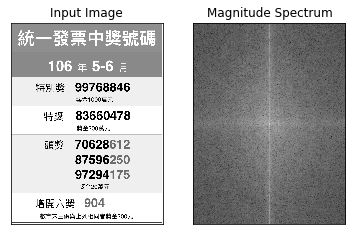

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 18 15:30:10 2014
@author: duan
"""
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(path,0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#这里构建振幅图的公式没学过
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
#取绝对值
img_back = np.abs(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('messi_face.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [20]:
for i in range(5,0,-1):
    print(i)

5
4
3
2
1
